### Preparando os dados

In [1]:
# importando os dados
import pandas as pd

path = r'/home/lapisco/Desktop/ica/ICA/Dados/datasets/artificial/batman/data.csv'
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,771,421,2
0,343,223,1
1,958,657,1
2,982,219,1
3,393,271,1
4,892,33,1
...,...,...,...
9994,149,97,1
9995,846,402,2
9996,311,74,1
9997,707,643,1


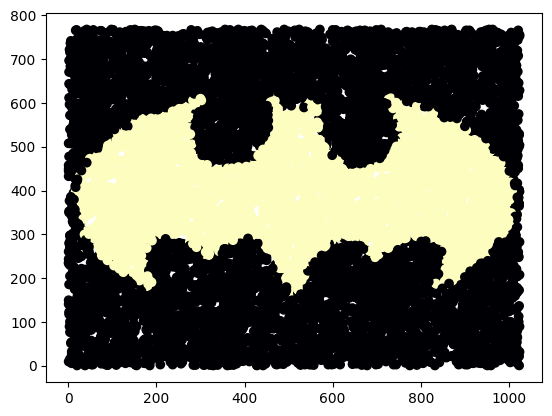

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x = data['771'], y = data['421'], c=data['2'], cmap = 'magma')

In [3]:
# Verificando os valores de y

data['2'].value_counts()

2
1    6635
2    3364
Name: count, dtype: int64

In [4]:
# Pré-processamento
#   Normalizando os dados

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
normalizador.fit(data)

dados_normalizados = pd.DataFrame(normalizador.transform(data), columns = data.columns)
dados_normalizados.head()

X = dados_normalizados.drop(columns='2')
y = dados_normalizados['2']

XB = data.drop(columns='2')
yB = data['2']

Para fins de comparação de desempenho, vamos criar modelos que vão usar tanto os dados pré-processados quanto os dados sem pré-processamento

In [5]:
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Para mostrar as metricas

def metricas(matriz_confusao):
    VP, FN = matriz_confusao[0]
    FP, VN = matriz_confusao[1]
    sensibilidade = VP/(VP+FN)
    especificidade =VN/(FP+VN)
    acuracia = (VP + VN)/(VP+FN+FP+VN)
    return [sensibilidade, especificidade, acuracia]
    

### MLP 

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlp.fit(X_train, y_train)
predi = mlp.predict(X_test)


mlpB = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlpB.fit(X_trainB, y_trainB)
prediB = mlpB.predict(X_testB)

# Matriz de confusão para calcular as métricas
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predi)

array([[1327,   36],
       [  95,  542]])

In [8]:
confusion_matrix(y_testB, prediB)

array([[1245,  118],
       [ 544,   93]])

In [9]:
metrics = metricas(confusion_matrix(y_test, predi))
metricsB = metricas(confusion_matrix(y_testB, prediB))

print('MLP COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('MLP COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')


MLP COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.9735876742479824; ESPECIFICIDADE: 0.8508634222919937;  ACURÁCIA: 0.9345 

MLP COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.9134262655906089; ESPECIFICIDADE: 0.14599686028257458;  ACURÁCIA: 0.669


In [25]:
import numpy as np
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlp.fit(X_train, y_train)
predi = mlp.predict(X_test)

# Defina os limites da grade para a superfície de decisão
x_min, x_max = X_train['771'].min() - 0.1, X_train['771'].max() + 0.1
y_min, y_max = X_train['421'].min() - 0.1, X_train['421'].max() + 0.1

# Crie uma grade de pontos para a superfície de decisão
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Preveja a classe para cada ponto na grade
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/home/lapisco/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


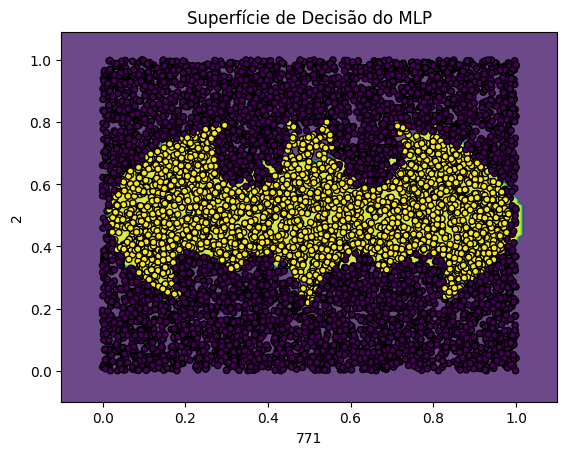

In [36]:

# Plote a superfície de decisão
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train['771'], X_train['421'], c=y_train, s=20, edgecolor='k')
plt.xlabel('771')
plt.ylabel('2')
plt.title('Superfície de Decisão do MLP')
plt.show()

### Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

naiveBayesGaussian = GaussianNB()
naiveBayesGaussian.fit(X_train, y_train)
prediNB = naiveBayesGaussian.predict(X_test)

naiveBayesGaussianB = GaussianNB()
naiveBayesGaussianB.fit(X_trainB, y_trainB)
prediNBB = naiveBayesGaussianB.predict(X_testB)

print(confusion_matrix(prediNB, y_test))

[[1325  258]
 [  38  379]]


In [11]:
print(confusion_matrix(prediNBB, y_testB))

[[1325  258]
 [  38  379]]


In [12]:
metrics = metricas(confusion_matrix(y_test, prediNB))
metricsB = metricas(confusion_matrix(y_testB, prediNBB))

print('NAIVE BAYES COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('NAIVE BAYES COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

NAIVE BAYES COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.9721203228173148; ESPECIFICIDADE: 0.5949764521193093;  ACURÁCIA: 0.852 

NAIVE BAYES COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.9721203228173148; ESPECIFICIDADE: 0.5949764521193093;  ACURÁCIA: 0.852


/home/lapisco/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


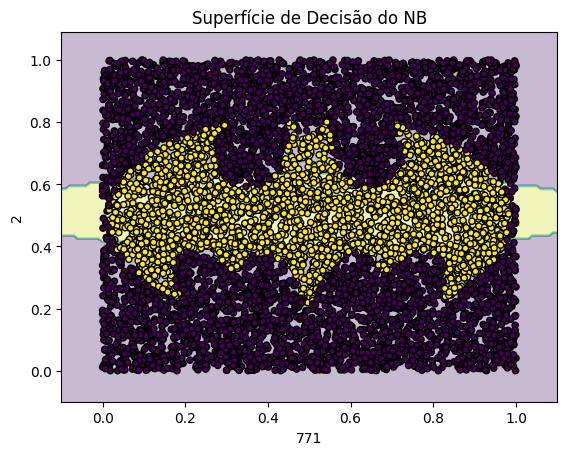

In [37]:
import numpy as np
from sklearn.naive_bayes import GaussianNB


naiveBayesGaussian = GaussianNB()
naiveBayesGaussian.fit(X_train, y_train)
prediNB = naiveBayesGaussian.predict(X_test)

# Defina os limites da grade para a superfície de decisão
x_min, x_max = X_train['771'].min() - 0.1, X_train['771'].max() + 0.1
y_min, y_max = X_train['421'].min() - 0.1, X_train['421'].max() + 0.1

# Crie uma grade de pontos para a superfície de decisão
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Preveja a classe para cada ponto na grade
Z = naiveBayesGaussian.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z,  alpha=0.3)
plt.scatter(X_train['771'], X_train['421'], c=y_train, s=20, edgecolor='k')
plt.xlabel('771')
plt.ylabel('2')
plt.title('Superfície de Decisão do NB')
plt.show()

### SVM RBF

In [13]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=5, gamma=0.1)

svc.fit(X_train, y_train)
prediSVC = svc.predict(X_test)



svcB = SVC(kernel='rbf',C=5, gamma=0.1)

svcB.fit(X_trainB, y_trainB)
prediSVCB = svcB.predict(X_testB)


print(confusion_matrix(prediSVC, y_test))

[[1139   61]
 [ 224  576]]


In [14]:
print(confusion_matrix(prediSVCB, y_testB))

[[1361  408]
 [   2  229]]


In [15]:
metrics = metricas(confusion_matrix(y_test, prediSVC))
metricsB = metricas(confusion_matrix(y_testB, prediSVCB))

print('SVM RBF COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('SVM RBF COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

SVM RBF COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.8356566397652238; ESPECIFICIDADE: 0.9042386185243328;  ACURÁCIA: 0.8575 

SVM RBF COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.9985326485693323; ESPECIFICIDADE: 0.35949764521193095;  ACURÁCIA: 0.795


/home/lapisco/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


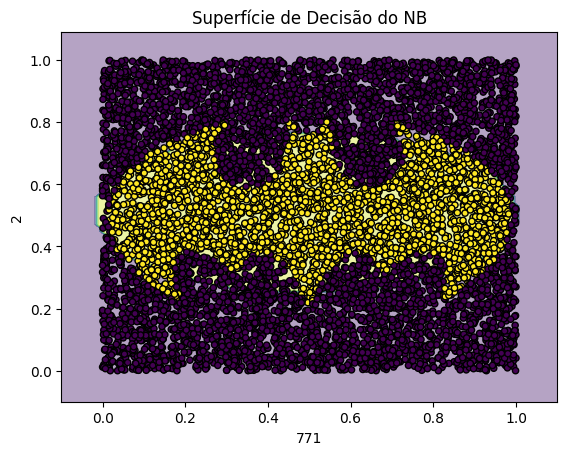

In [45]:
import numpy as np
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=5, gamma=0.1)
svc.fit(X_train, y_train)
prediSVC = svc.predict(X_test)


# Defina os limites da grade para a superfície de decisão
x_min, x_max = X_train['771'].min() - 0.1, X_train['771'].max() + 0.1
y_min, y_max = X_train['421'].min() - 0.1, X_train['421'].max() + 0.1

# Crie uma grade de pontos para a superfície de decisão
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Preveja a classe para cada ponto na grade
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z,  alpha=0.4)
plt.scatter(X_train['771'], X_train['421'], c=y_train, s=20, edgecolor='k')
plt.xlabel('771')
plt.ylabel('2')
plt.title('Superfície de Decisão do NB')
plt.show()

### SVM Polinomial

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc_pol = SVC(kernel='poly', C=5, gamma=2, degree=0)


svc_pol.fit(X_train, y_train)
prediSVC_poli = svc_pol.predict(X_test)

print(confusion_matrix(prediSVC_poli, y_test))



[[1363  637]
 [   0    0]]


In [8]:
svc_polB = SVC(kernel='poly', C=5, gamma=2, degree=0)


svc_polB.fit(X_trainB, y_trainB)
prediSVC_poliB = svc_polB.predict(X_testB)


print(confusion_matrix(prediSVC_poliB, y_testB))

[[1363  637]
 [   0    0]]


In [9]:
metrics = metricas(confusion_matrix(y_test, prediSVC_poli))
metricsB = metricas(confusion_matrix(y_testB, prediSVC_poliB))

print('SVM RBF COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('SVM RBF COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

SVM RBF COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 1.0; ESPECIFICIDADE: 0.0;  ACURÁCIA: 0.6815 

SVM RBF COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 1.0; ESPECIFICIDADE: 0.0;  ACURÁCIA: 0.6815


### SVM Linear

In [ ]:
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', C=9, gamma=5, degree=4)


svc_lin.fit(X_train, y_train)
prediSVC_lin = svc_lin.predict(X_test)

print(confusion_matrix(prediSVC_lin, y_test))

In [ ]:
metrics = metricas(confusion_matrix(prediSVC_lin, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.6815; ESPECIFICIDADE: nan;  ACURÁCIA: 0.6815


/tmp/ipykernel_6707/662972416.py:7: RuntimeWarning: invalid value encountered in scalar divide
  especificidade =VN/(FP+VN)
